In [ ]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

# CLEANING THE DATASET

In [ ]:
IOT = pd.read_csv('datasets/RT_IOT2022.csv')
df  = IOT.copy()
df.columns

Index(['no', 'id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
  

In [ ]:
df.info() # there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   no                        123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

# UNDERSTANDING THE DATASET

In [ ]:
print(df['Attack_type'].unique())

['MQTT_Publish' 'Thing_Speak' 'Wipro_bulb' 'ARP_poisioning'
 'DDOS_Slowloris' 'DOS_SYN_Hping' 'Metasploit_Brute_Force_SSH'
 'NMAP_FIN_SCAN' 'NMAP_OS_DETECTION' 'NMAP_TCP_scan' 'NMAP_UDP_SCAN'
 'NMAP_XMAS_TREE_SCAN']


In [ ]:
normalTraffic = df.query("Attack_type == ['MQTT_Publish', 'Thing_Speak', 'Wipro_bulb']").copy()
normalTraffic.groupby(['Attack_type'])['proto'].value_counts(normalize = True)

Attack_type   proto
MQTT_Publish  tcp      1.000000
Thing_Speak   udp      0.528367
              tcp      0.466083
              icmp     0.005550
Wipro_bulb    tcp      0.719368
              udp      0.272727
              icmp     0.007905
Name: proportion, dtype: float64

In [ ]:
normalTraffic.groupby(['Attack_type'])['service'].value_counts(normalize = True)

Attack_type   service
MQTT_Publish  mqtt       0.996623
              -          0.002653
              http       0.000724
Thing_Speak   dns        0.501850
              http       0.328934
              ssl        0.135298
              -          0.018624
              ntp        0.013567
              dhcp       0.001727
Wipro_bulb    ssl        0.422925
              dns        0.209486
              -          0.177866
              irc        0.169960
              dhcp       0.019763
Name: proportion, dtype: float64

In [ ]:
for i in df['Attack_type'].unique():
    print(f'============{i}============')
    print(df[df['Attack_type'] == i][['fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'payload_bytes_per_second']].corr())

============MQTT_Publish============
                          fwd_pkts_per_sec  bwd_pkts_per_sec  \
fwd_pkts_per_sec                  1.000000          0.982272   
bwd_pkts_per_sec                  0.982272          1.000000   
payload_bytes_per_second          0.036978          0.222918   

                          payload_bytes_per_second  
fwd_pkts_per_sec                          0.036978  
bwd_pkts_per_sec                          0.222918  
payload_bytes_per_second                  1.000000  
============Thing_Speak============
                          fwd_pkts_per_sec  bwd_pkts_per_sec  \
fwd_pkts_per_sec                  1.000000          0.721518   
bwd_pkts_per_sec                  0.721518          1.000000   
payload_bytes_per_second          0.775788          0.721317   

                          payload_bytes_per_second  
fwd_pkts_per_sec                          0.775788  
bwd_pkts_per_sec                          0.721317  
payload_bytes_per_second                  

In [ ]:
attackTraffic = df.query("Attack_type != ['MQTT_Publish', 'Thing_Speak', 'Wipro_bulb']").copy()
normalTraffic.groupby(['Attack_type'])[['fwd_iat.min','fwd_iat.max']].describe().T

Attack_type        MQTT_Publish   Thing_Speak    Wipro_bulb
fwd_iat.min count  4.146000e+03  8.108000e+03  2.530000e+02
            mean   5.870610e+02  3.247304e+04  2.254381e+05
            std    1.641465e+04  7.148558e+05  9.120691e+05
            min    0.000000e+00  0.000000e+00  0.000000e+00
            25%    2.379417e+02  9.202957e+01  0.000000e+00
            50%    2.489090e+02  2.298355e+02  2.570152e+02
            75%    2.601147e+02  8.010864e+02  1.458883e+03
            max    1.024596e+06  4.351004e+07  4.999861e+06
fwd_iat.max count  4.146000e+03  8.108000e+03  2.530000e+02
            mean   4.077816e+07  3.640664e+05  7.658392e+06
            std    2.131175e+07  2.847486e+06  2.136352e+07
            min    0.000000e+00  0.000000e+00  0.000000e+00
            25%    2.786899e+07  2.729893e+02  0.000000e+00
            50%    4.188855e+07  4.839456e+04  2.021739e+05
            75%    5.981022e+07  2.940836e+05  8.365170e+06
            max    2.608391e+08  9.094560e+07  1.919112e+08

In [ ]:
attackTraffic.groupby(['Attack_type'])[['fwd_iat.min','fwd_iat.max']].describe().T

Attack_type        ARP_poisioning  DDOS_Slowloris  DOS_SYN_Hping  \
fwd_iat.min count    7.750000e+03    5.340000e+02        94659.0   
            mean     9.581486e+04    1.576989e+04            0.0   
            std      4.828884e+06    1.271324e+05            0.0   
            min      0.000000e+00    0.000000e+00            0.0   
            25%      0.000000e+00    8.106232e+00            0.0   
            50%      6.198883e+00    1.597405e+01            0.0   
            75%      1.811981e+01    2.598763e+01            0.0   
            max      3.002526e+08    1.084738e+06            0.0   
fwd_iat.max count    7.750000e+03    5.340000e+02        94659.0   
            mean     4.247964e+06    9.203524e+06            0.0   
            std      1.459109e+07    8.793742e+06            0.0   
            min      0.000000e+00    0.000000e+00            0.0   
            25%      0.000000e+00    2.001882e+03            0.0   
            50%      8.106232e+00    1.516354e+07            0.0   
            75%      9.893984e+04    1.843404e+07            0.0   
            max      3.002526e+08    2.123161e+07            0.0   

Attack_type        Metasploit_Brute_Force_SSH  NMAP_FIN_SCAN  \
fwd_iat.min count                3.700000e+01      28.000000   
            mean                 4.939835e+04       7.748604   
            std                  2.069933e+05      35.414501   
            min                  0.000000e+00       0.000000   
            25%                  2.002716e+01       0.000000   
            50%                  5.161762e+02       0.000000   
            75%                  1.286983e+03       0.000000   
            max                  9.035470e+05     185.966492   
fwd_iat.max count                3.700000e+01      28.000000   
            mean                 2.268121e+06   10340.358530   
            std                  2.760933e+06   54709.960253   
            min                  0.000000e+00       0.000000   
            25%                  1.275860e+06       0.000000   
            50%                  1.889811e+06       0.000000   
            75%                  2.114470e+06       0.000000   
            max                  1.408013e+07  289499.044418   

Attack_type        NMAP_OS_DETECTION  NMAP_TCP_scan  NMAP_UDP_SCAN  \
fwd_iat.min count             2000.0    1002.000000   2.590000e+03   
            mean                 0.0       2.490070   5.088106e+03   
            std                  0.0      74.904791   1.653769e+05   
            min                  0.0       0.000000   0.000000e+00   
            25%                  0.0       0.000000   0.000000e+00   
            50%                  0.0       0.000000   0.000000e+00   
            75%                  0.0       0.000000   0.000000e+00   
            max                  0.0    2370.119095   8.107945e+06   
fwd_iat.max count             2000.0    1002.000000   2.590000e+03   
            mean                 0.0      12.133888   2.960731e+04   
            std                  0.0     221.715663   7.368668e+05   
            min                  0.0       0.000000   0.000000e+00   
            25%                  0.0       0.000000   0.000000e+00   
            50%                  0.0       0.000000   0.000000e+00   
            75%                  0.0       0.000000   0.000000e+00   
            max                  0.0    5269.050598   3.278050e+07   

Attack_type        NMAP_XMAS_TREE_SCAN  
fwd_iat.min count         2.010000e+03  
            mean          1.099572e-01  
            std           4.294057e+00  
            min           0.000000e+00  
            25%           0.000000e+00  
            50%           0.000000e+00  
            75%           0.000000e+00  
            max           1.900196e+02  
fwd_iat.max count         2.010000e+03  
            mean          5.078388e+02  
            std           2.276726e+04  
            min           0.000000e+00  
            25%           0.00

In [ ]:
df.groupby(['Attack_type'])[['fwd_iat.avg','bwd_iat.avg']].describe().T

Attack_type        ARP_poisioning  DDOS_Slowloris  DOS_SYN_Hping  \
fwd_iat.avg count    7.750000e+03    5.340000e+02        94659.0   
            mean     7.443455e+05    2.660823e+06            0.0   
            std      6.080604e+06    2.505477e+06            0.0   
            min      0.000000e+00    0.000000e+00            0.0   
            25%      0.000000e+00    1.263877e+03            0.0   
            50%      8.106232e+00    4.362737e+06            0.0   
            75%      3.036066e+04    5.107711e+06            0.0   
            max      3.002526e+08    6.103740e+06            0.0   
bwd_iat.avg count    7.750000e+03    5.340000e+02        94659.0   
            mean     7.664256e+05    2.523958e+06            0.0   
            std      3.813601e+06    2.760618e+06            0.0   
            min      0.000000e+00    0.000000e+00            0.0   
            25%      0.000000e+00    1.784354e+03            0.0   
            50%      1.041889e+02    2.563950e+06            0.0   
            75%      6.787091e+04    5.092944e+06            0.0   
            max      1.501489e+08    1.058325e+07            0.0   

Attack_type        MQTT_Publish  Metasploit_Brute_Force_SSH  NMAP_FIN_SCAN  \
fwd_iat.avg count  4.146000e+03                3.700000e+01      28.000000   
            mean   4.941675e+06                4.313227e+05    4114.728315   
            std    2.703778e+06                1.071899e+06   21767.022118   
            min    0.000000e+00                0.000000e+00       0.000000   
            25%    3.439565e+06                1.096741e+05       0.000000   
            50%    5.009167e+06                1.480301e+05       0.000000   
            75%    6.886319e+06                1.706666e+05       0.000000   
            max    3.923471e+07                4.313726e+06  115181.398392   
bwd_iat.avg count  4.146000e+03                3.700000e+01      28.000000   
            mean   5.222072e+05                9.100383e+05    6539.123399   
            std    1.378185e+06                4.747146e+06   27765.895184   
            min    0.000000e+00                0.000000e+00       0.000000   
            25%    3.839272e+05                1.063905e+05       0.000000   
            50%    3.996923e+05                1.665667e+05       0.000000   
            75%    4.476724e+05                1.847412e+05       0.000000   
            max    3.044517e+07                2.900158e+07  142786.502838   

Attack_type        NMAP_OS_DETECTION  NMAP_TCP_scan  NMAP_UDP_SCAN  \
fwd_iat.avg count             2000.0    1002.000000   2.590000e+03   
            mean                 0.0       7.311979   1.436467e+04   
            std                  0.0     134.569955   4.294105e+05   
            min                  0.0       0.000000   0.000000e+00   
            25%                  0.0       0.000000   0.000000e+00   
            50%                  0.0       0.000000   0.000000e+00   
            75%                  0.0       0.000000   0.000000e+00   
            max                  0.0    2994.537354   2.067726e+07   
bwd_iat.avg count             2000.0    1002.000000   2.590000e+03   
            mean                 0.0       0.000000   1.786866e+02   
            std                  0.0       0.000000   4.287451e+03   
            min                  0.0       0.000000   0.000000e+00   
            25%                  0.0       0.000000   0.000000e+00   
            50%                  0.0       0.000000   0.000000e+00   
            75%                  0.0       0.000000   0.000000e+00   
            max                  0.0       0.000000   1.434383e+05   

Attack_type        NMAP_XMAS_TREE_SCAN   Thing_Speak    Wipro_bulb  
fwd_iat.avg count          2010.000000  8.108000e+03  2.530000e+02  
            mean            187.429524  1.186232e+05  2.093047e+06  
            std            8402.340607  8.328482e+05  7.004656e+06  
            min               0.000000  0.000000e

# VISUALIZATION

## V1

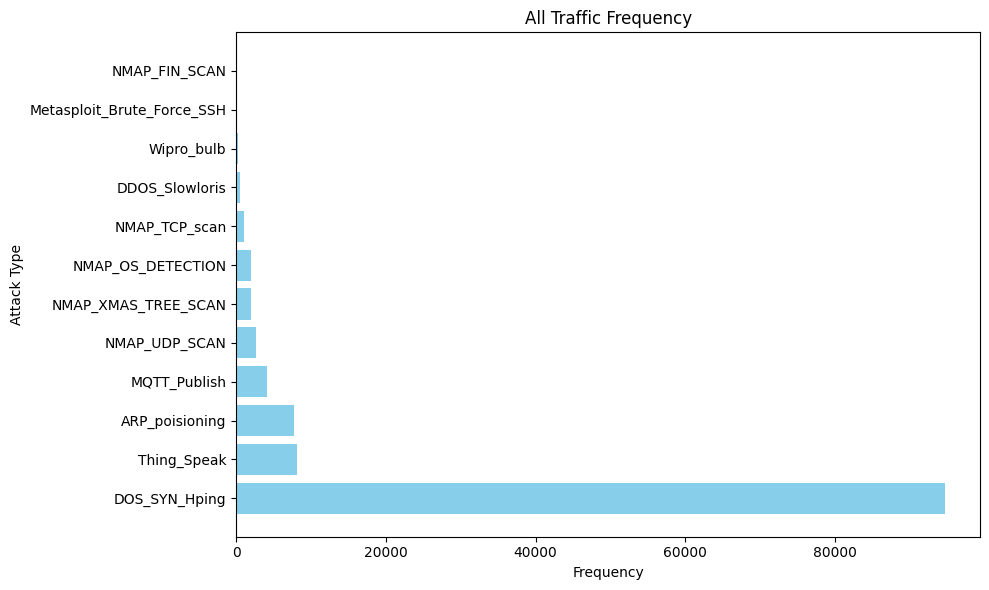

MQTT_Publish = 4146
Thing_Speak = 8108
Wipro_bulb = 253
ARP_poisioning = 7750
DDOS_Slowloris = 534
DOS_SYN_Hping = 94659
Metasploit_Brute_Force_SSH = 37
NMAP_FIN_SCAN = 28
NMAP_OS_DETECTION = 2000
NMAP_TCP_scan = 1002
NMAP_UDP_SCAN = 2590
NMAP_XMAS_TREE_SCAN = 2010


In [ ]:
plt.figure(tight_layout=True, figsize=(10, 6))
plt.barh(df['Attack_type'].value_counts().index, df['Attack_type'].value_counts().values, color='skyblue')
plt.title('All Traffic Frequency')
plt.ylabel('Attack Type')
plt.xlabel('Frequency')
plt.show()

for i in df.Attack_type.unique():
    n = df[df['Attack_type'] == i].copy()
    print(f'{i} = {len(n)}')

In [ ]:
df.groupby('Attack_type')['Attack_type'].count().sort_values()

,Attack_type
Attack_type,
NMAP_FIN_SCAN,28
Metasploit_Brute_Force_SSH,37
Wipro_bulb,253
DDOS_Slowloris,534
NMAP_TCP_scan,1002
NMAP_OS_DETECTION,2000
NMAP_XMAS_TREE_SCAN,2010
NMAP_UDP_SCAN,2590
MQTT_Publish,4146


Since the the Traffic "DOS_SYN_Hping" under the category of a Malicious or the 'abnormal' internet traffic caught in the dataset, the focus of the
analysis along with the ARP_poisioning and NMAP_UDP_SCAN since they are among the top 3 malicious internet traffic identified and recorded. The
Thing_Speak and MQTT_Publish will not be utilized since they are normal internet traffic.

## V2

['mqtt' '-' 'http' 'dns' 'ntp' 'ssl' 'dhcp' 'irc' 'ssh' 'radius']
['ARP_poisioning' 'DDOS_Slowloris' 'DOS_SYN_Hping'
 'Metasploit_Brute_Force_SSH' 'NMAP_FIN_SCAN' 'NMAP_OS_DETECTION'
 'NMAP_TCP_scan' 'NMAP_UDP_SCAN' 'NMAP_XMAS_TREE_SCAN']


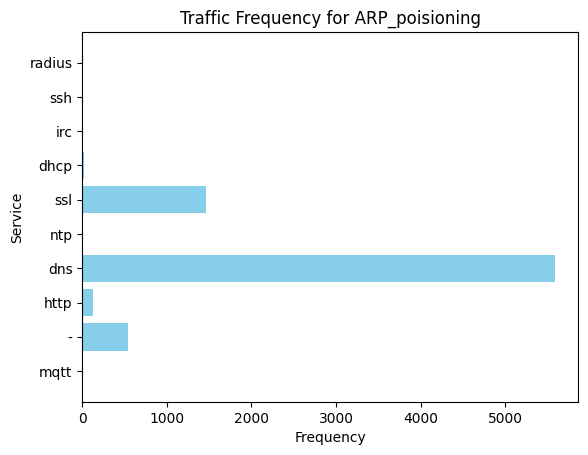

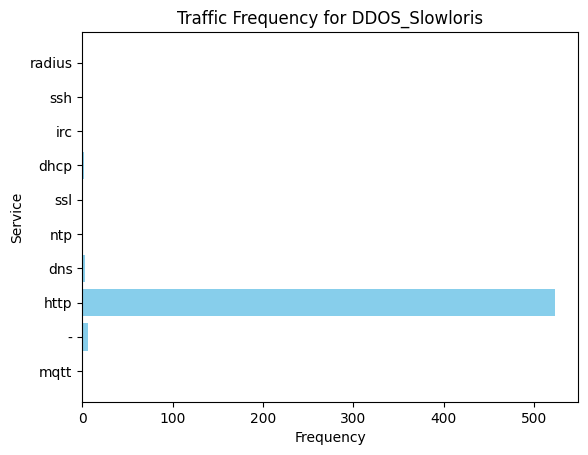

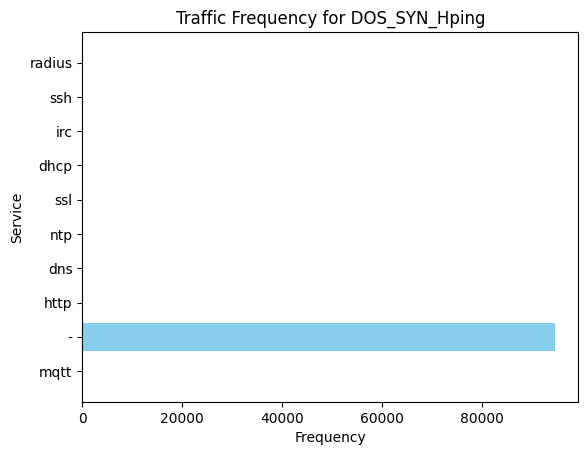

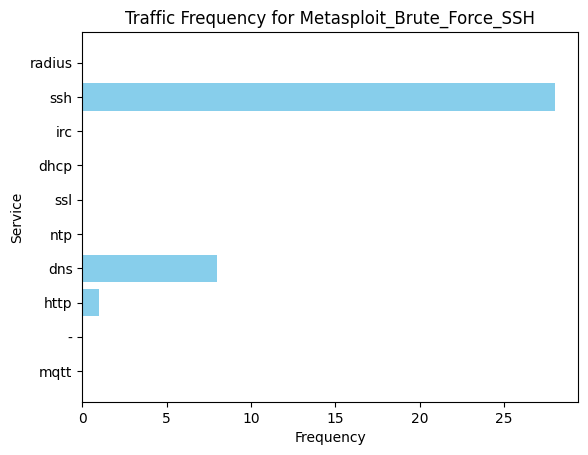

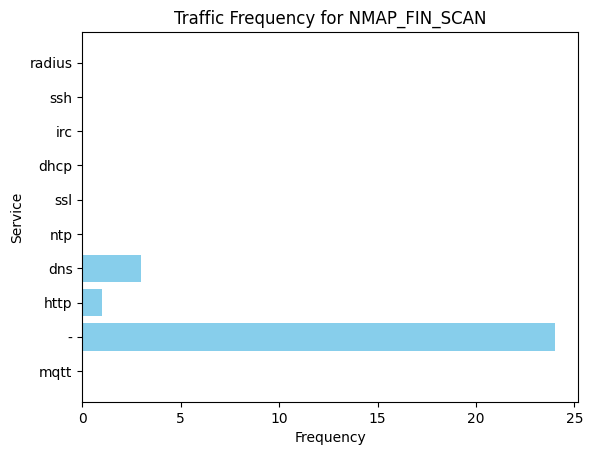

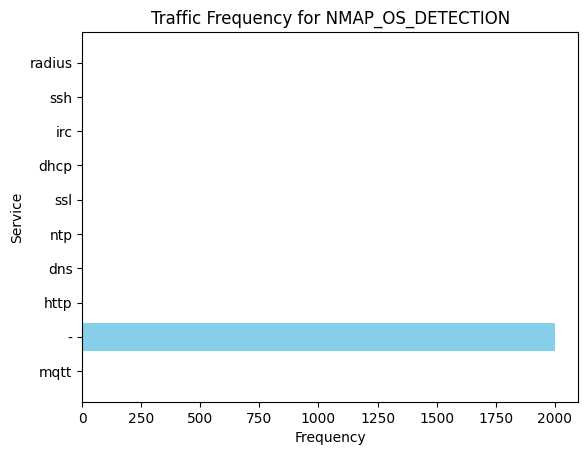

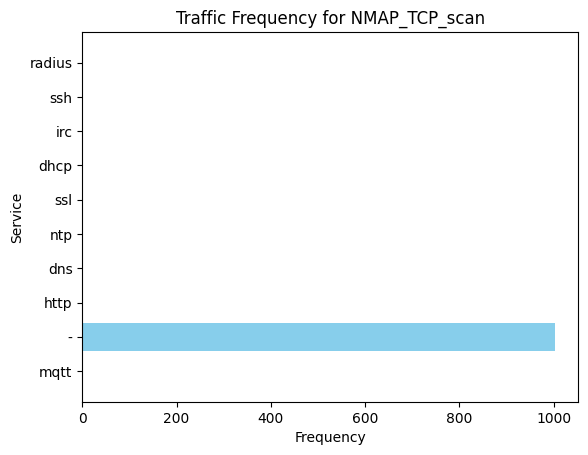

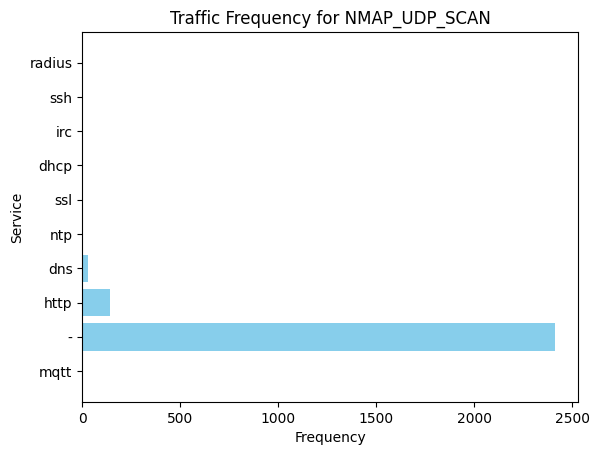

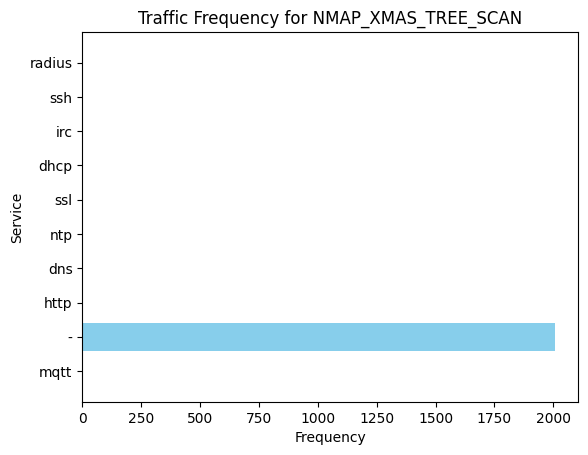

In [ ]:
# 'proto', 'service'

SERVE   = df['service'].unique()
TRAFFIC = attackTraffic['Attack_type'].unique()
print(SERVE)
print(TRAFFIC)

for n in TRAFFIC:

    for i in SERVE:
        filtered_data = df[(df['Attack_type'] == n) & (df['service'] == i)]
        count = len(filtered_data)
        plt.barh(i, count, color='skyblue')

    plt.title(f'Traffic Frequency for {n}')
    plt.xlabel('Frequency')
    plt.ylabel('Service')
    plt.show()

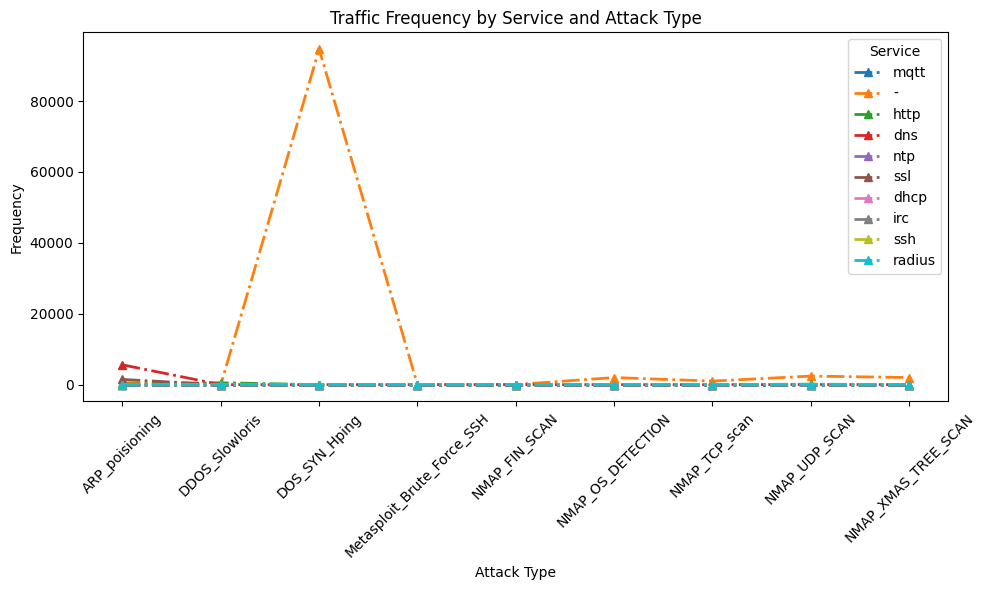

In [ ]:
SERVE = df['service'].unique()  # Unique services
TRAFFIC = attackTraffic['Attack_type'].unique()  # Unique attack types

plt.figure(figsize=(10, 6))
for i in SERVE:
    SERVEamnt = []

    for n in TRAFFIC:
        attackNservice = df[(df['Attack_type'] == n) & (df['service'] == i)]
        SERVEamnt.append(len(attackNservice))

    plt.plot(TRAFFIC, SERVEamnt, label=i, marker='^', linestyle='-.', linewidth=2)

plt.title('Traffic Frequency by Service and Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Service')

plt.tight_layout()
plt.show()

In [ ]:
attackTraffic.groupby(['Attack_type'])['service'].value_counts()

Attack_type                 service
ARP_poisioning              dns         5583
                            ssl         1459
                            -            546
                            http         129
                            dhcp          26
                            ntp            7
DDOS_Slowloris              http         523
                            -              6
                            dns            3
                            dhcp           2
DOS_SYN_Hping               -          94659
Metasploit_Brute_Force_SSH  ssh           28
                            dns            8
                            http           1
NMAP_FIN_SCAN               -             24
                            dns            3
                            http           1
NMAP_OS_DETECTION           -           2000
NMAP_TCP_scan               -           1002
NMAP_UDP_SCAN               -           2411
                            http         139
                            dns           31
                            ntp            4
                            dhcp           3
                            radius         2
NMAP_XMAS_TREE_SCAN         -           2006
                            dns            3
                            http           1
Name: count, dtype: int64

In [ ]:
for i in attackTraffic.Attack_type.unique():
    print(f'=================={i}')
    print(attackTraffic[attackTraffic['Attack_type'] == i].groupby('service')['Attack_type'].count().sort_values())

==================ARP_poisioning
service
ntp        7
dhcp      26
http     129
-        546
ssl     1459
dns     5583
Name: Attack_type, dtype: int64
==================DDOS_Slowloris
service
dhcp      2
dns       3
-         6
http    523
Name: Attack_type, dtype: int64
==================DOS_SYN_Hping
service
-    94659
Name: Attack_type, dtype: int64
==================Metasploit_Brute_Force_SSH
service
http     1
dns      8
ssh     28
Name: Attack_type, dtype: int64
==================NMAP_FIN_SCAN
service
http     1
dns      3
-       24
Name: Attack_type, dtype: int64
==================NMAP_OS_DETECTION
service
-    2000
Name: Attack_type, dtype: int64
==================NMAP_TCP_scan
service
-    1002
Name: Attack_type, dtype: int64
==================NMAP_UDP_SCAN
service
radius       2
dhcp         3
ntp          4
dns         31
http       139
-         2411
Name: Attack_type, dtype: int64
==================NMAP_XMAS_TREE_SCAN
service
http       1
dns        3
-       2006
Name: A

## V3

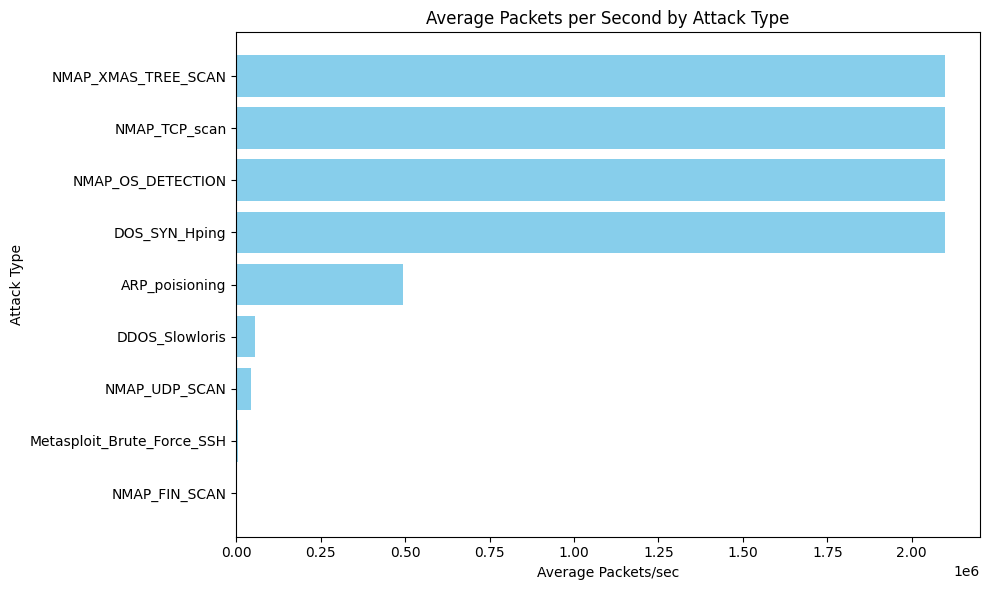

In [ ]:
max_traffic = attackTraffic.groupby('Attack_type')['flow_pkts_per_sec'].max().sort_values()

plt.figure(figsize=(10, 6))
bars = plt.barh(max_traffic.index, max_traffic.values, color='skyblue')
plt.title('Average Packets per Second by Attack Type')
plt.xlabel('Average Packets/sec')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()

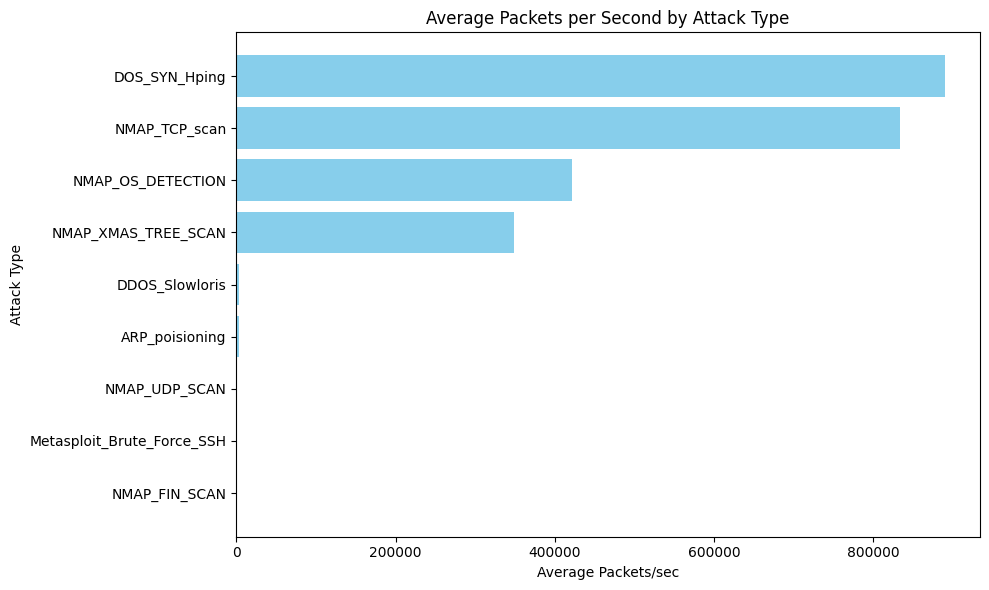

In [ ]:
average_traffic = attackTraffic.groupby('Attack_type').agg({
    'flow_pkts_per_sec': 'mean',
    'flow_duration': 'mean'
}).sort_values(by='flow_pkts_per_sec', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(average_traffic.index, average_traffic['flow_pkts_per_sec'], color='skyblue')

plt.title('Average Packets per Second by Attack Type')
plt.xlabel('Average Packets/sec')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()

In [ ]:
attackTraffic.groupby(['Attack_type'])['proto'].value_counts(normalize = True)

Attack_type                 proto
ARP_poisioning              udp      0.750323
                            tcp      0.248645
                            icmp     0.001032
DDOS_Slowloris              tcp      0.990637
                            udp      0.009363
DOS_SYN_Hping               tcp      1.000000
Metasploit_Brute_Force_SSH  tcp      0.783784
                            udp      0.216216
NMAP_FIN_SCAN               tcp      0.892857
                            udp      0.107143
NMAP_OS_DETECTION           tcp      1.000000
NMAP_TCP_scan               tcp      1.000000
NMAP_UDP_SCAN               udp      0.944402
                            tcp      0.054826
                            icmp     0.000772
NMAP_XMAS_TREE_SCAN         tcp      0.998507
                            udp      0.001493
Name: proportion, dtype: float64

In [ ]:
attackTraffic.groupby(['Attack_type'])['service'].value_counts(normalize = True)

Attack_type                 service
ARP_poisioning              dns        0.720387
                            ssl        0.188258
                            -          0.070452
                            http       0.016645
                            dhcp       0.003355
                            ntp        0.000903
DDOS_Slowloris              http       0.979401
                            -          0.011236
                            dns        0.005618
                            dhcp       0.003745
DOS_SYN_Hping               -          1.000000
Metasploit_Brute_Force_SSH  ssh        0.756757
                            dns        0.216216
                            http       0.027027
NMAP_FIN_SCAN               -          0.857143
                            dns        0.107143
                            http       0.035714
NMAP_OS_DETECTION           -          1.000000
NMAP_TCP_scan               -          1.000000
NMAP_UDP_SCAN               -          0.930888
                            http       0.053668
                            dns        0.011969
                            ntp        0.001544
                            dhcp       0.001158
                            radius     0.000772
NMAP_XMAS_TREE_SCAN         -          0.998010
                            dns        0.001493
                            http       0.000498
Name: proportion, dtype: float64

In [ ]:
attackTraffic[['flow_duration','Attack_type']].sort_values(by = 'flow_duration', ascending = False)
print(attackTraffic[['flow_pkts_per_sec','Attack_type']].sort_values(by = 'flow_pkts_per_sec', ascending = False))
temp = attackTraffic[attackTraffic['Attack_type'] == 'DOS_SYN_Hping'].copy()
# attackTraffic[attackTraffic['Attack_type'] == 'DOS_SYN_Hping']
print(temp[['flow_duration','Attack_type']].sort_values(by = 'flow_duration', ascending = False))

        flow_pkts_per_sec    Attack_type
83669           2097152.0  DOS_SYN_Hping
83670           2097152.0  DOS_SYN_Hping
83671           2097152.0  DOS_SYN_Hping
83672           2097152.0  DOS_SYN_Hping
83674           2097152.0  DOS_SYN_Hping
...                   ...            ...
112533                0.0  DOS_SYN_Hping
112534                0.0  DOS_SYN_Hping
112535                0.0  DOS_SYN_Hping
112536                0.0  DOS_SYN_Hping
112521                0.0  DOS_SYN_Hping

[110610 rows x 2 columns]
        flow_duration    Attack_type
42851        0.000045  DOS_SYN_Hping
20791        0.000041  DOS_SYN_Hping
38133        0.000039  DOS_SYN_Hping
48455        0.000038  DOS_SYN_Hping
38121        0.000037  DOS_SYN_Hping
...               ...            ...
115429       0.000000  DOS_SYN_Hping
115430       0.000000  DOS_SYN_Hping
115431       0.000000  DOS_SYN_Hping
115432       0.000000  DOS_SYN_Hping
115433       0.000000  DOS_SYN_Hping

[94659 rows x 2 columns]


In [ ]:
temp = attackTraffic[attackTraffic['Attack_type'] == 'DOS_SYN_Hping'].copy()

print(len(temp[temp['flow_duration'] != 0]))
temp2 = temp[temp['flow_duration'] != 0].copy()
temp2['flow_duration'].sort_values(ascending = True)

83797


,flow_duration
54526,0.000001
54527,0.000001
54529,0.000001
54530,0.000001
54531,0.000001
...,...
38121,0.000037
48455,0.000038
38133,0.000039
20791,0.000041


In [ ]:
temp = attackTraffic[attackTraffic['Attack_type'] == 'DOS_SYN_Hping'].copy()

print(len(temp[temp['flow_pkts_per_sec'] != 0]))
temp2 = temp[temp['flow_pkts_per_sec'] != 0].copy()
print(temp2['flow_pkts_per_sec'].min())
print(temp2['flow_pkts_per_sec'].max())
temp2['flow_pkts_per_sec'].sort_values(ascending = True)

83797
44384.169312
2097152.0


,flow_pkts_per_sec
42851,4.438417e+04
20791,4.877098e+04
38133,5.146385e+04
48455,5.242880e+04
38121,5.412005e+04
...,...
28825,2.097152e+06
112263,2.097152e+06
112262,2.097152e+06
28829,2.097152e+06


In [ ]:
# plt.plot(temp, temp['fwd_bulk_packets'])
temp.sample(5).T

,49724,92883,86148,35573,41545
no,28933,72092,65357,14782,20754
id.orig_p,31844,61885,23828,17625,23597
id.resp_p,21,21,21,21,21
proto,tcp,tcp,tcp,tcp,tcp
service,-,-,-,-,-
...,...,...,...,...,...
idle.std,0.0,0.0,0.0,0.0,0.0
fwd_init_window_size,64,64,64,64,64
bwd_init_window_size,0,0,0,0,0
fwd_last_window_size,64,64,64,64,64


## **V4**

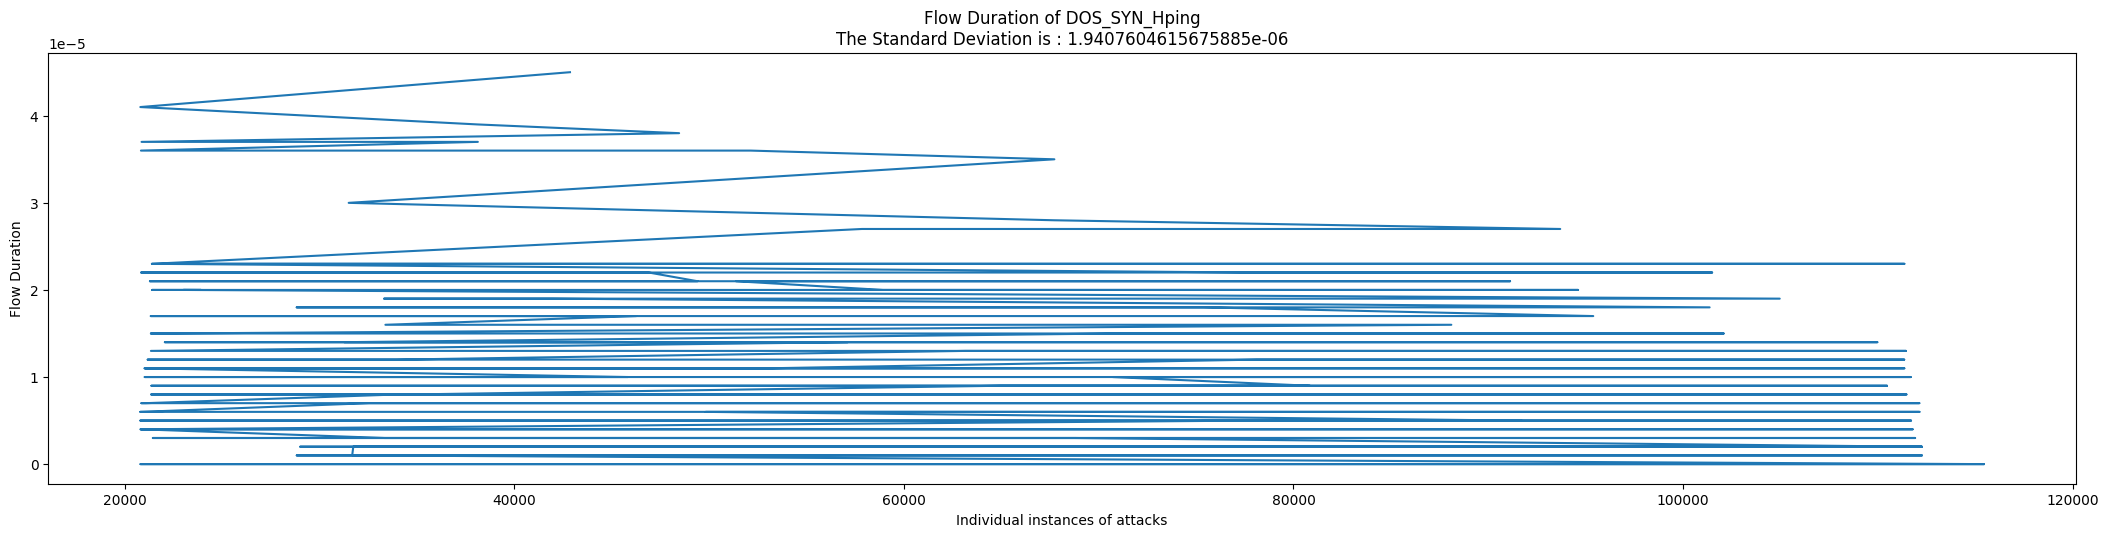

In [ ]:
x = temp['flow_duration'].std()
plt.figure(figsize = (21,5))
plt.plot(temp['flow_duration'].sort_values())
plt.tight_layout()
plt.title(f'Flow Duration of DOS_SYN_Hping\nThe Standard Deviation is : {x}')
plt.xlabel('Individual instances of attacks')
plt.ylabel('Flow Duration')
plt.show()

In [ ]:
x=df.groupby('Attack_type')['flow_duration'].mean()

In [ ]:
top3 = attackTraffic.query("Attack_type == ['DOS_SYN_Hping', 'NMAP_UDP_SCAN', 'ARP_poisioning']")
top3.sample(3).T

,101077,111853,107087
no,80286,91062,86296
id.orig_p,65463,3475,1654
id.resp_p,21,21,21
proto,tcp,tcp,tcp
service,-,-,-
...,...,...,...
idle.std,0.0,0.0,0.0
fwd_init_window_size,64,64,64
bwd_init_window_size,0,0,0
fwd_last_window_size,64,64,64


## **V5**

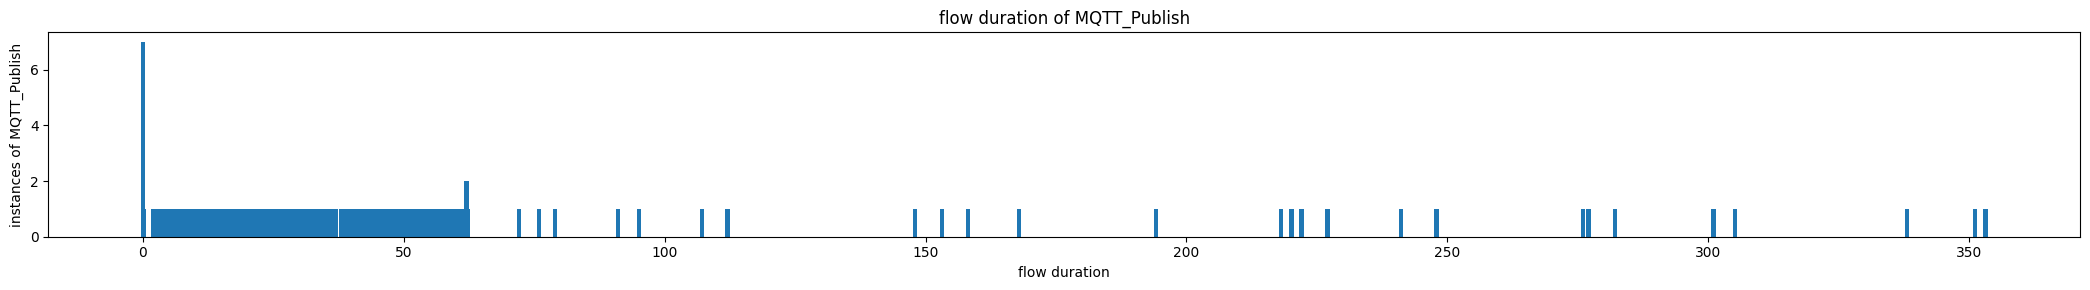

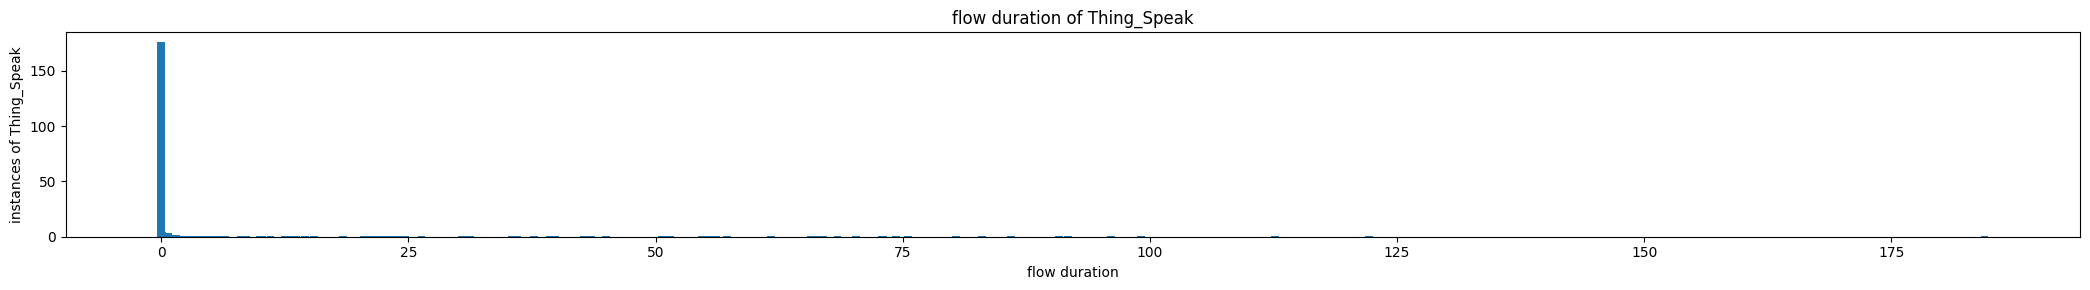

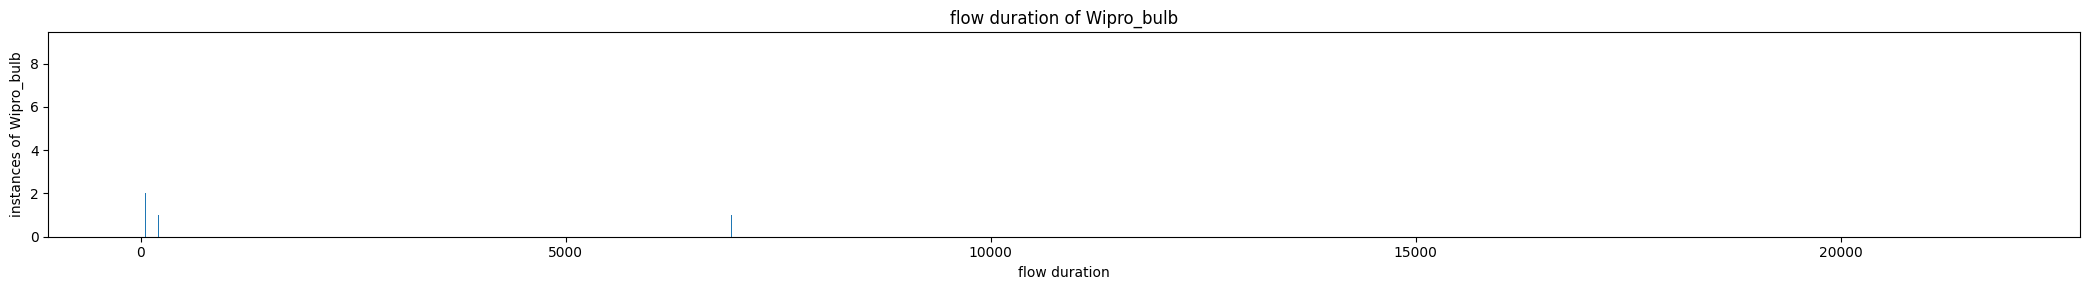

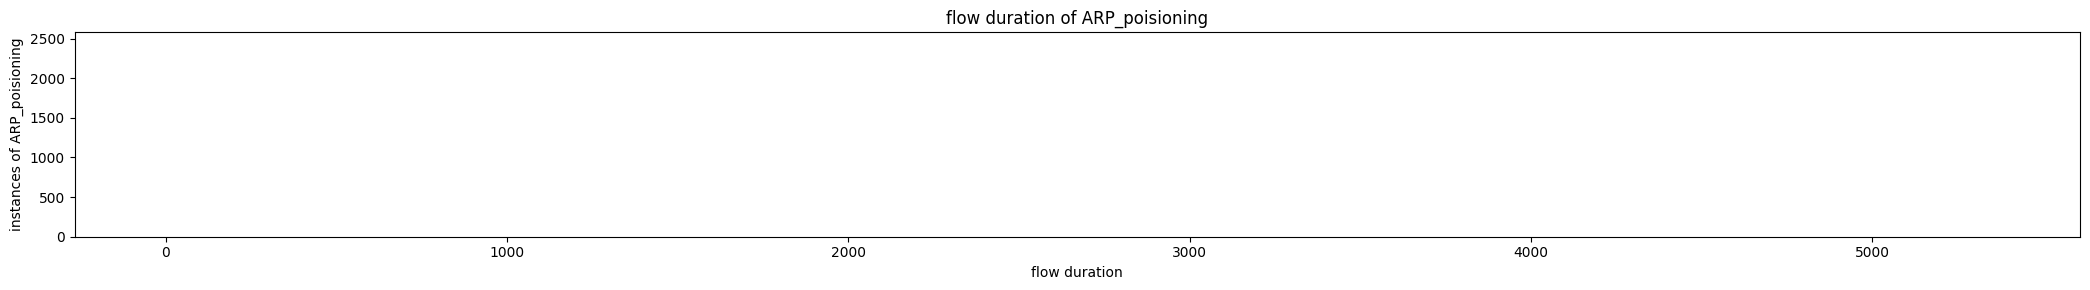

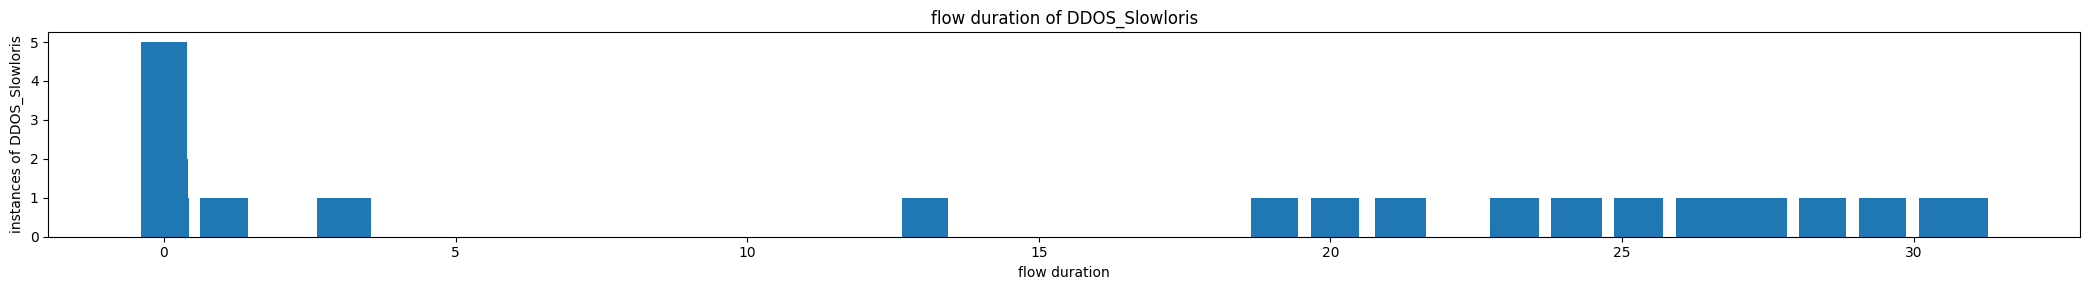

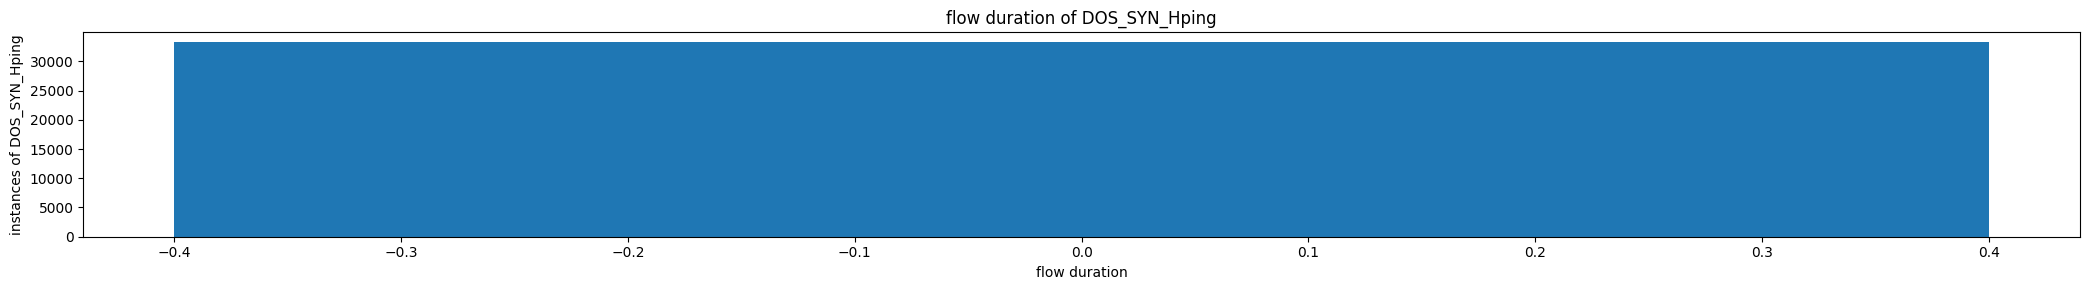

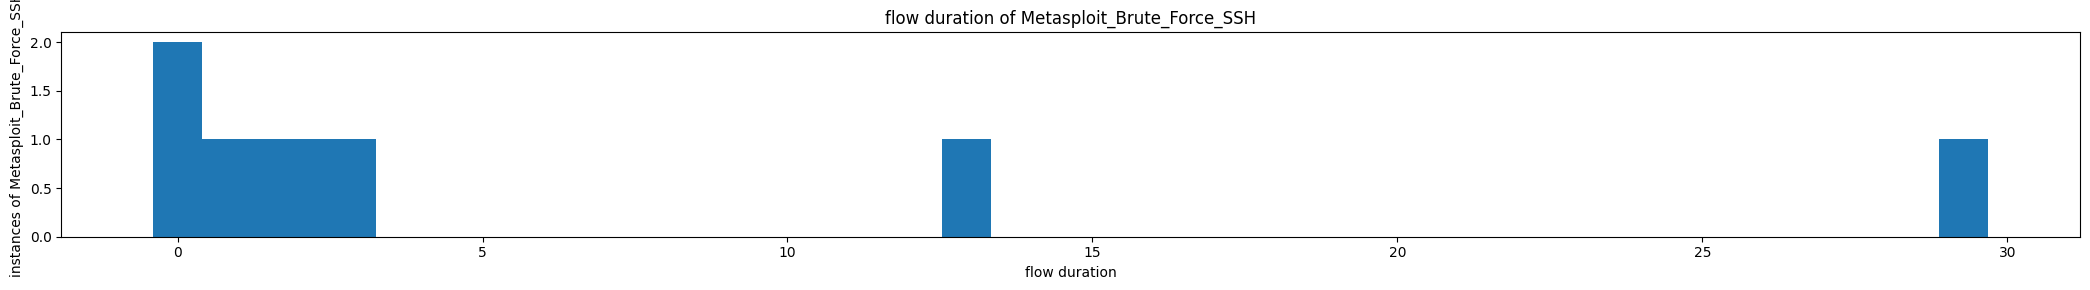

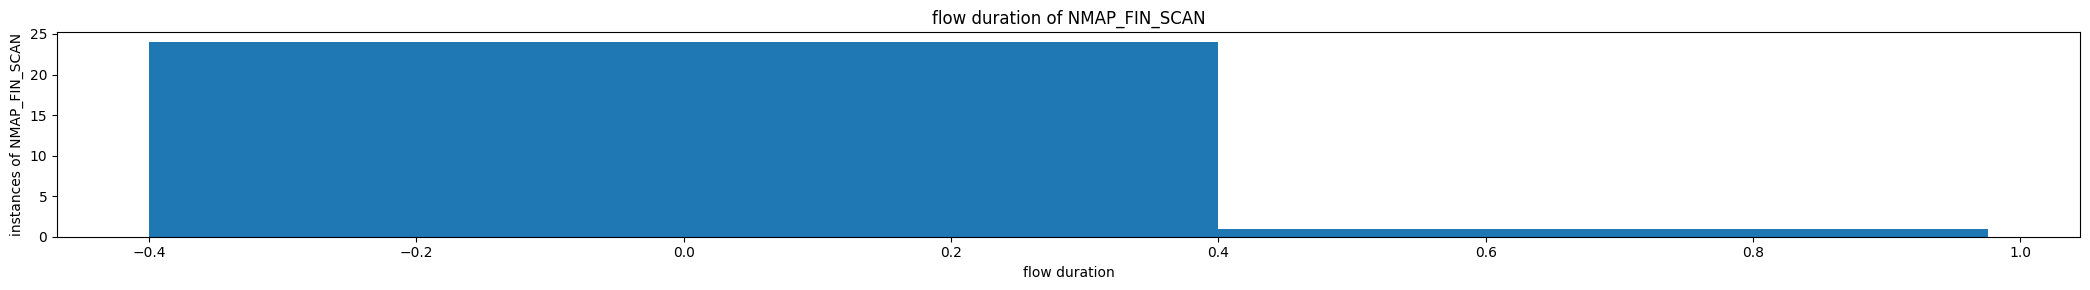

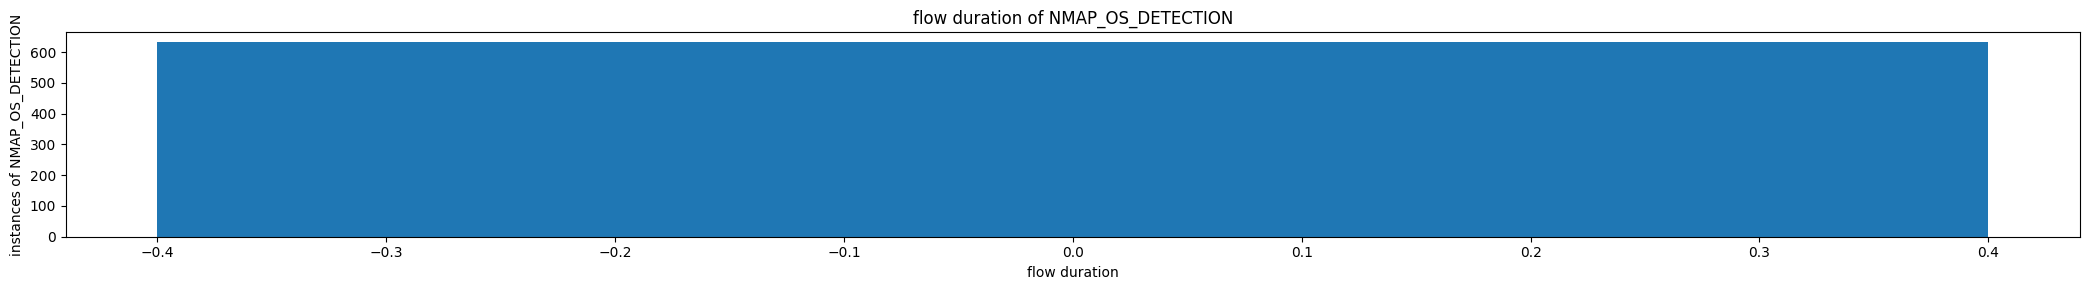

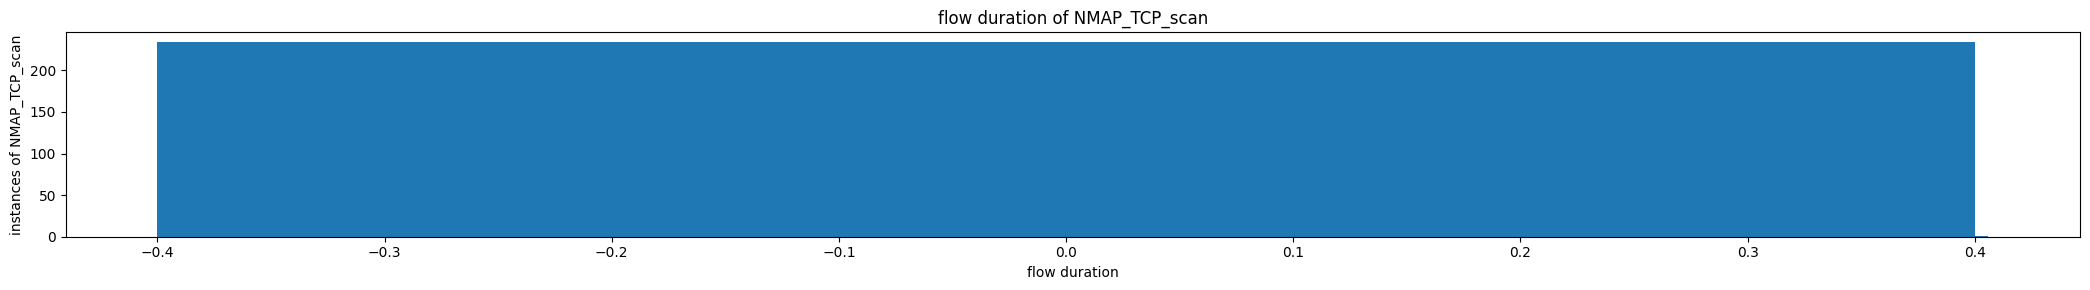

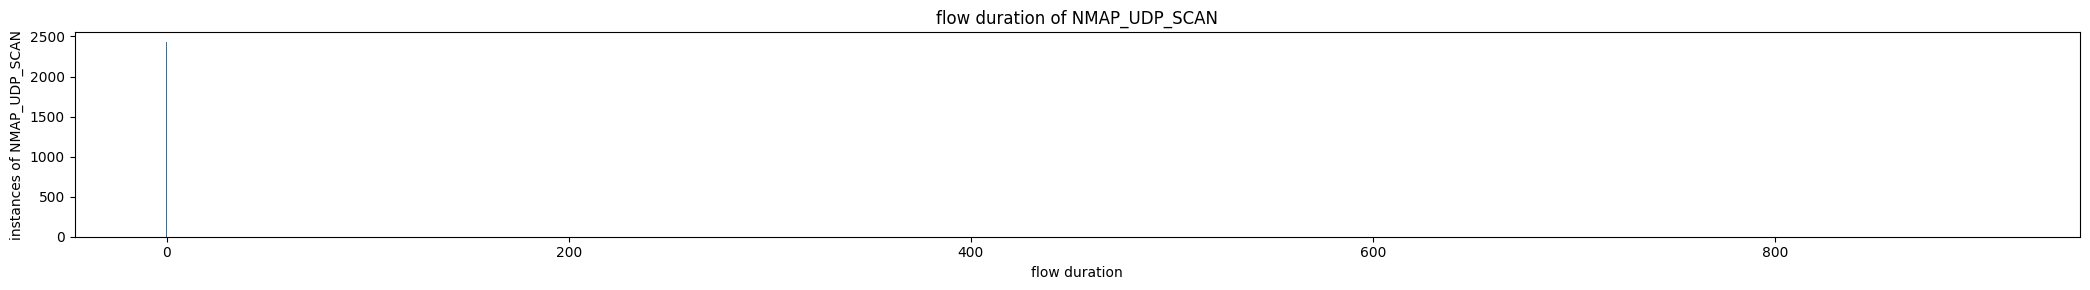

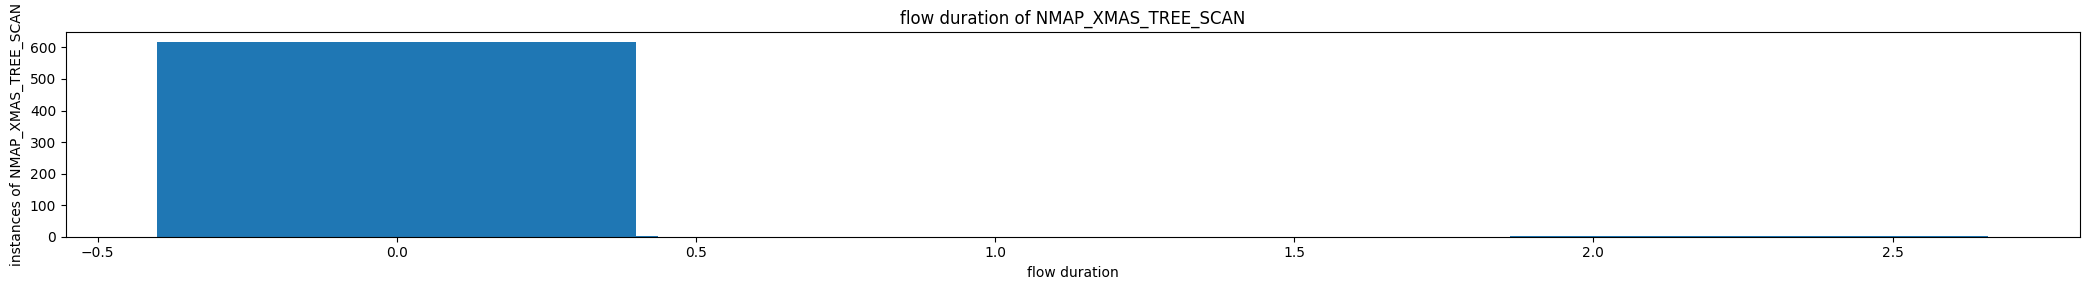

In [ ]:
# flow_duration
# Attack_type

# for i in df.Attack_type.unique():
#     temp = df[df['Attack_type'] == i]
#     plt.plot(temp.index, df['flow_duration'])

var = df.Attack_type.unique()

for i in var:
    temp = df[df['Attack_type'] == i]
    plt.figure(tight_layout=True, figsize=(21, 3))
    plt.bar(temp['flow_duration'].value_counts().index, temp['flow_duration'].value_counts().values)
    plt.title(f'flow duration of {i}')
    plt.xlabel('flow duration')
    plt.ylabel(f'instances of {i}')
    plt.show()

# for i in df.Attack_type.unique():
#     n = df[df['Attack_type'] == i].copy()
#     print(f'{i} = {len(n)}')

## **V6**

In [ ]:
attackTraffic = df.query("Attack_type != ['MQTT_Publish', 'Thing_Speak', 'Wipro_bulb']").copy()

In [ ]:
df3 = attackTraffic.groupby('Attack_type')['flow_duration'].mean()
df3

,flow_duration
Attack_type,
ARP_poisioning,15.893538
DDOS_Slowloris,14.699148
DOS_SYN_Hping,0.000003
Metasploit_Brute_Force_SSH,3.006557
NMAP_FIN_SCAN,0.023614
NMAP_OS_DETECTION,0.000008
NMAP_TCP_scan,0.000019
NMAP_UDP_SCAN,0.737766
NMAP_XMAS_TREE_SCAN,0.001171


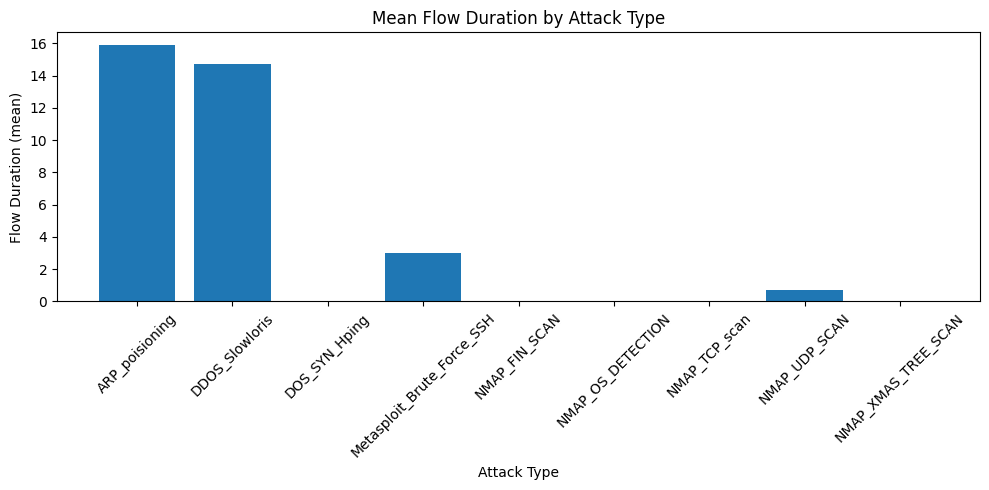

In [ ]:
df3 = df3.reset_index()
plt.figure(figsize=(10, 5))

plt.bar(df3['Attack_type'], df3['flow_duration'])

plt.xlabel('Attack Type')
plt.ylabel('Flow Duration (mean)')
plt.title('Mean Flow Duration by Attack Type')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()